# Get a code to add realistic scatter and apply to mock lightcone data
Goal:
- 3 functions $\sigma(T), \sigma(L), \sigma(Y)$


In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import clusterfit as cf
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('nice.mplstyle')

## Step 1: Measurement error

In [64]:
# Load M21 data
obs_data = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/obs/obs-properties.csv')
obs_data

,z,T(keV),Tmax,Tmin,Lx(1e44),eL(%),NHtot(1e20),Metal(solar),Met_max,Met_min,...,Y(nr/no_ksz),e_Y.2,Y(nr_mmf),e_Y.3,Y(nr_mf),e_Y.4,Abs_2MASS,BCG_Off.(/r500),Catalog,Analysed_by
0,0.2965,15.771000,16.169001,15.445000,20.510000,7.900000,6.44,0.378000,0.431000,0.336000,...,0.006365,0.000280,0.006300,0.000279,0.006838,0.000251,-27.302999,0.370,REFLEX,Chandra
1,0.0347,3.219000,3.271000,3.173000,3.030591,3.100000,30.50,0.385000,0.412000,0.361000,...,0.013039,0.001725,0.013064,0.001725,0.014058,0.001843,-25.742001,0.008,NORAS,Chandra
2,0.1073,4.674000,5.063000,4.353000,2.565000,9.100000,5.45,0.157000,0.293000,0.055000,...,0.003309,0.000446,0.003310,0.000446,0.003442,0.000421,-26.070000,0.028,NORAS,Chandra
3,0.0940,4.719000,4.915000,4.525000,1.245964,11.300000,2.13,0.332000,0.393000,0.261000,...,0.002611,0.000390,0.002617,0.000390,0.002600,0.000368,-1.000000,0.019,REFLEX,Chandra
4,0.0940,6.134000,6.782000,5.700000,1.427884,11.600000,4.46,0.624000,0.867000,0.373000,...,0.003937,0.000472,0.003937,0.000472,0.004137,0.000430,-27.004000,0.170,NORAS,Chandra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,0.0780,5.197000,6.510000,4.157700,1.087983,9.200000,4.40,0.497220,0.645514,0.361811,...,0.002750,0.000597,0.002749,0.000598,0.002787,0.000643,-26.302999,0.088,NORAS,XMM-Newton
309,0.0808,5.206686,5.774241,4.767557,1.114198,41.599998,4.60,0.779359,0.951330,0.607005,...,0.002983,0.000520,0.002981,0.000520,0.002813,0.000500,-25.764999,0.071,REFLEX,XMM-Newton
310,0.0554,1.309336,1.449910,1.192012,0.620700,26.600000,5.00,0.265811,0.280540,0.249088,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-24.851000,0.079,REFLEX,XMM-Newton
311,0.0661,3.613667,4.025164,3.221494,0.687003,36.000000,2.37,0.351152,0.422142,0.288451,...,0.001318,0.000391,0.001322,0.000390,0.001369,0.000365,-26.033001,0.127,REFLEX,XMM-Newton


(0.6256743949940858, 0.3794944026808771, 10.41787739477515)


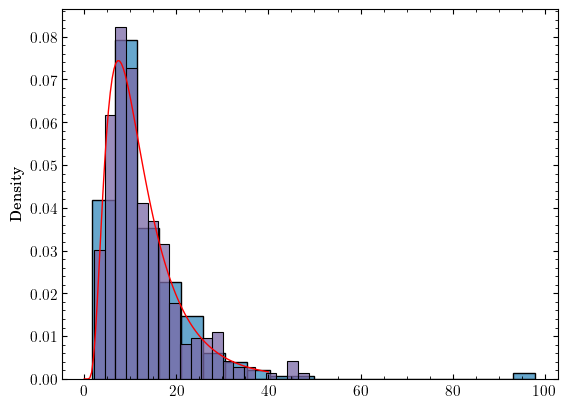

In [65]:
# fit a log normal distribution
from scipy import stats
res = stats.lognorm.fit(obs_data['eL(%)'])  # in sequence s, loc, scale
print(res)

# Draw from the fitted distribution
reL = stats.lognorm.rvs(size=313, *res)

# Plot the real, fitted, simulated random error
sns.histplot(obs_data['eL(%)'], stat='density', bins=20)
sns.histplot(reL, stat='density', bins=20)
X = np.linspace(0, 40, 100)
plt.plot(X, stats.lognorm.pdf(X, s=res[0], loc=res[1], scale=res[2]), color='r')
plt.xlabel('')
plt.show()

(0.42990349875064454, -3.224984897982001, 9.158040534876896)


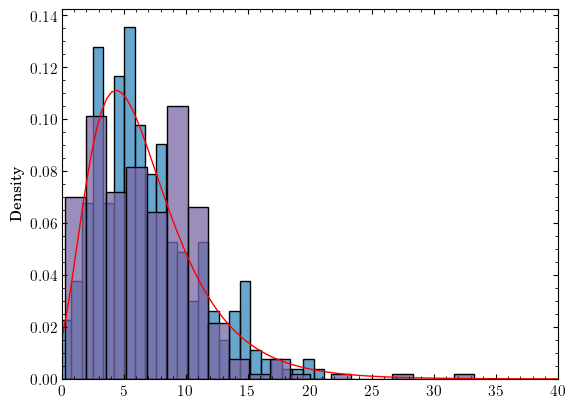

In [66]:
# fit a log normal distribution
from scipy import stats

max = obs_data['Tmax'].values
min = obs_data['Tmin'].values
d = obs_data['T(keV)'].values
eT = np.mean((np.abs(max-d)/d, np.abs(d-min)/d), axis=0) * 100
eT = eT[eT < 40]

res = stats.lognorm.fit(eT)  # in sequence s, loc, scale
print(res)

# Draw from the fitted distribution
reT = stats.lognorm.rvs(size=313, *res)

# Plot the real, fitted, simulated random error
sns.histplot(reT, stat='density', bins=25)
sns.histplot(eT, stat='density', bins=20)
X = np.linspace(0, 40, 100)
plt.plot(X, stats.lognorm.pdf(X, *res), color='r')
plt.xlim(0, 40)
plt.show()

(260,)


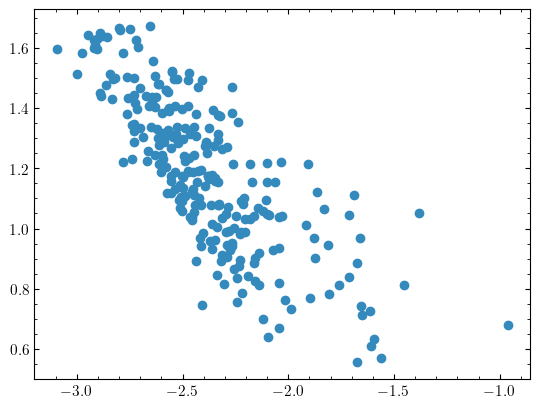

In [67]:
# For Ysz: fit a log taking account of eYsz
Y5r500 = obs_data['Y(r/no_ksz_arcmin^2)'].values
Yerr = obs_data['e_Y'].values
z = obs_data['z'].values

# SNR ratio selection to keep 260 objects
mask = (Y5r500 > 0) & (Y5r500/Yerr > 2)        

# Ysz
Y5r500 = Y5r500[mask]
Yerr = Yerr[mask]

# Percentage error for Ysz
eY = Yerr / Y5r500 * 100
print(eY.shape)

plt.scatter(np.log10(Y5r500), np.log10(eY))

(0.5575018314274753, -0.39872019799228503, 15.744102091967681)


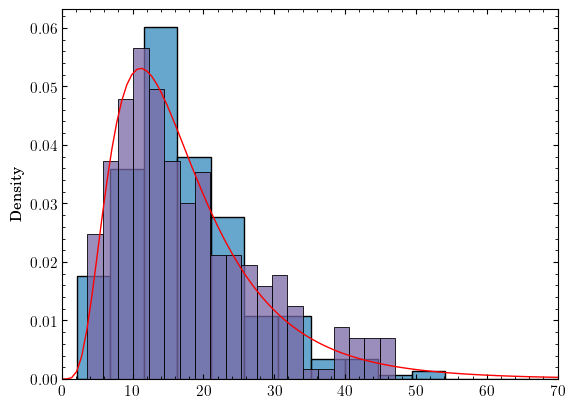

In [68]:
# fit a log normal distribution
from scipy import stats

# eY = eY[eY < 40]

res = stats.lognorm.fit(eY)  # in sequence s (size), loc, scale
print(res)

# Draw from the fitted distribution
reY = stats.lognorm.rvs(size=313, *res)

# Plot the real, fitted, simulated random error
sns.histplot(reY, stat='density', bins=25)
sns.histplot(eY, stat='density', bins=20)
X = np.linspace(0, 70, 100)
plt.plot(X, stats.lognorm.pdf(X, *res), color='r')
plt.xlim(0, 70)
plt.show()

Best-fit parameters:
A = 57.6000
alpha = -0.3742
lognormal scatter (σ_log_eY) = 0.1565 dex


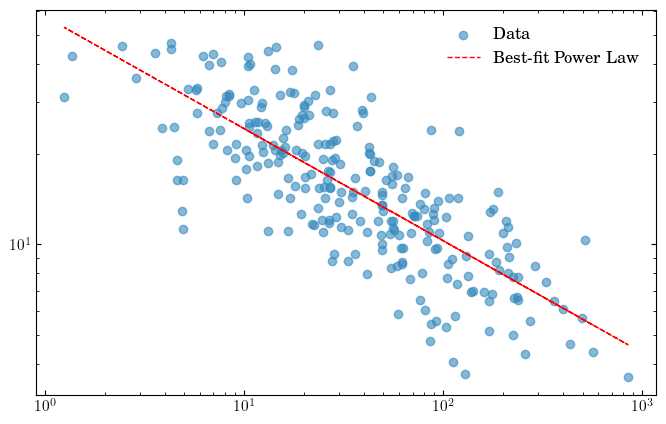

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Get absolute Ysz
Y = cf.Ysz(obs_data)

# Take logarithm of data
log_Y = np.log10(Y)
log_eY = np.log10(eY)

# Fit log-log power law: log(eY) = log(A) + (1 - α) * log(Y)
slope, intercept, r_value, p_value, std_err = linregress(log_Y, log_eY)

# Extract parameters
A_fit = 10**intercept  # A in linear space
alpha_fit = slope  # Extract α from the slope

# Compute residuals and lognormal scatter
log_eY_fit = intercept + slope * log_Y  # Best-fit line
log_residuals = log_eY - log_eY_fit
sigma_log_eY = np.std(log_residuals)  # Lognormal scatter

# Print results
print(f"Best-fit parameters:")
print(f"A = {A_fit:.4f}")
print(f"alpha = {alpha_fit:.4f}")
print(f"lognormal scatter (σ_log_eY) = {sigma_log_eY:.4f} dex")

# Plot data and fit
plt.figure(figsize=(8, 5))
plt.scatter(Y, eY, alpha=0.6, label='Data')
plt.plot(Y, (A_fit * Y**alpha_fit), 'r--', label='Best-fit Power Law')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


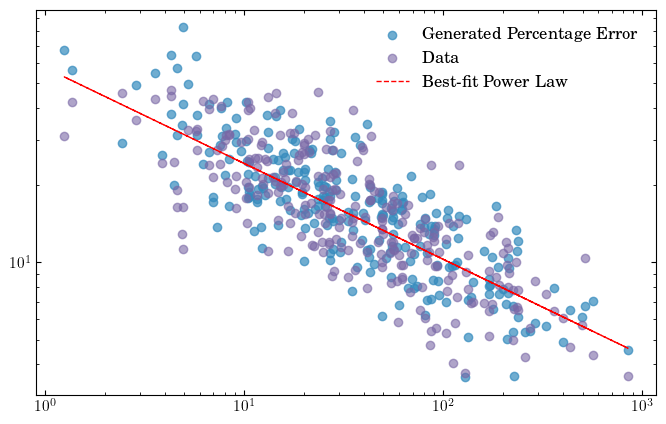

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Power-law parameters (replace with your fitted values)
A = A_fit
alpha = alpha_fit

# Generate percentage error following power law with lognormal scatter
percentage_error = A * Y**(alpha) * 10**np.random.normal(0, sigma_log_eY, size=Y.shape)

# Plot percentage error vs Y
plt.figure(figsize=(8, 5))
plt.scatter(Y, percentage_error, alpha=0.7, label='Generated Percentage Error')

plt.scatter(Y, eY, alpha=0.6, label='Data')
plt.plot(Y, (A_fit * Y**alpha_fit), 'r--', label='Best-fit Power Law')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


## 2. Intrinsic error

In [3]:
# INPUT_FILE = '/data1/yujiehe/data/samples_in_lightcone1_with_trees_duplicate_excision_outlier_excision.csv'
INPUT_FILE = '/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis/lc0000/samples_in_lightcone0000_duplicate_excision_outlier_excision.csv'

# Relations to fit
RELATIONS = ['YSZ-T', 'LX-T'] # pick from 'LX-T', 'M-T', 'YSZ-T'

# Fit range
FIT_RANGE = cf.LARGE_RANGE

{logA: 0.03200000000000003, B: 2.36, scat: 0.138, chi2: 1.0114354471673275}
scat_tot 0.18090884054992593


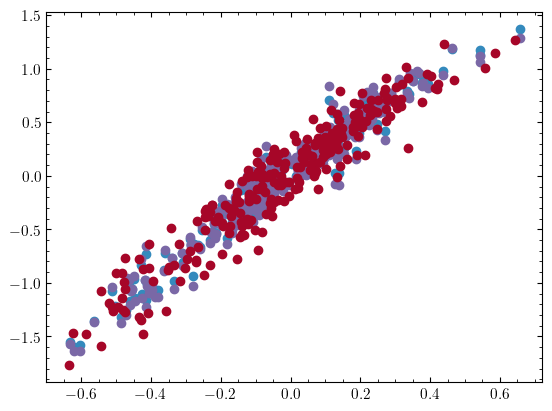

{logA: 0.242, B: 2.2640000000000002, scat: 0.228, chi2: 1.023193659341783}
scat_tot 0.24653051842720058


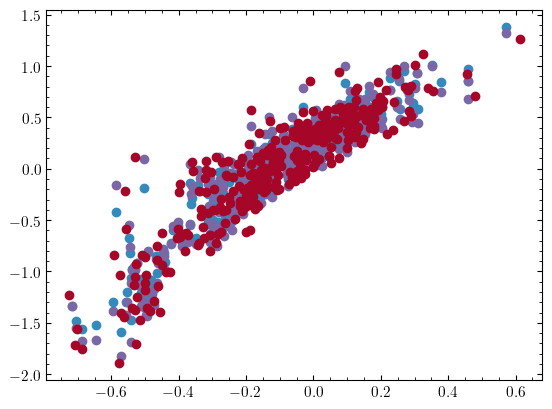

In [15]:
# Load data
data = pd.read_csv(INPUT_FILE)

for scaling_relation in RELATIONS: 

    # How many clusters to do
    n_clusters = cf.CONST[scaling_relation]['N']

    # Load the data
    yname, xname = cf.parse_relation_name(scaling_relation)
    Y = np.array(data[cf.COLUMNS[yname]][:n_clusters])
    X = np.array(data[cf.COLUMNS[xname]][:n_clusters])

    # Also load the position data
    phi_lc   = np.array(data['phi_on_lc'][:n_clusters])
    theta_lc = np.array(data['theta_on_lc'][:n_clusters])

    # the observed redshift from lightcone
    z_obs = np.array(data['ObservedRedshift'][:n_clusters])

# --------------------------- Apply intrinsic error -------------------------- #

    logY_ = cf.logY_(Y, z=z_obs, relation=scaling_relation)
    logX_ = cf.logX_(X, relation=scaling_relation)

    plt.scatter(logX_, logY_)

    best_fit_file = '/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis/lc0000/fit_all.csv'
    best_fit = pd.read_csv(best_fit_file)
    
    # Amplify the scatter
    logA_fit = np.log10(best_fit[best_fit['Relation']==scaling_relation]['BestFitA'].values)
    B_fit = best_fit[best_fit['Relation']==scaling_relation]['BestFitB'].values
    logY_ = (logY_ - B_fit * logX_ - logA_fit) * cf.scat_boost(yname) + B_fit * logX_ + logA_fit
    Y = cf.Y(logY_, z=z_obs, relation=scaling_relation)

    plt.scatter(logX_, logY_)


# -------------------------- Apply measurement error ------------------------- #

    # Apply y error
    if yname == 'LX':
        eY = cf.eL(size=Y.shape)
        Y = Y + np.random.choice(a=(1, -1), size=Y.shape) * eY * Y
    elif yname == 'YSZ':
        eY = cf.eY(Y=Y)
        Y = Y + np.random.choice(a=(1, -1), size=Y.shape) * eY * Y
    
    if xname == 'T':
        eX = cf.eT(size=X.shape)
        X = X + np.random.choice(a=(1, -1), size=X.shape) * eX * X

# --------------------------------- Test fit --------------------------------- #

    logY_ = cf.logY_(Y, z=z_obs, relation=scaling_relation)
    logX_ = cf.logX_(X, relation=scaling_relation)

    plt.scatter(logX_, logY_)

    scat_step = 0.006
    B_step = 0.002
    logA_step = 0.003

    # Make a fit
    best_fit = cf.run_fit(
        logY_, logX_, **FIT_RANGE[scaling_relation],
        scat_step  = scat_step,
        B_step     = B_step,
        logA_step  = logA_step,
        scat_obs_Y = np.log10(1 + eY), 
        scat_obs_X = np.log10(1 + eX),
        )
    
    print(best_fit)

    print('scat_tot', np.mean(np.log10(1 + eY)**2 + best_fit['B']**2 * np.log10(1 + eX)**2 + best_fit['scat']**2)**0.5)

    plt.show()

In [ ]:
print('scat_tot', np.mean(np.log10(1 + eY)**2 + best_fit['B']**2 * np.log10(1 + eX)**2 + best_fit['scat']**2)**0.5)

scat_tot 0.26445758490884685
